<a href="https://colab.research.google.com/github/RaTon84/Estructura-de-datos/blob/master/Pr%C3%A1ctica_2do_parcial_com3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/50px-Python-logo-notext.svg.png) **Mas ejemplos de ejercicios para 2do parcial** ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/50px-Python-logo-notext.svg.png)

Traten de resolverlos en papel.

###**florencia.dias@unahur.edu.ar** ###

In [ ]:
import copy as cp

class Diccionario: # principal
  #######TDA tupla clave-significado#########################
  class __TuplaDic: # propósito principal será definir la
  #igualdad por la clave de la relación
    def __init__(self, key, value): # contiene clave y significado
      self.__data = (key,value)

    def __repr__(self):
      return str(self.__data)

    def __eq__(self, key):
      return self.__data[0] == key

    def __hash__(self):
      return hash(self.__data[0])

    def getKey(self):
      return self.__data[0] # parte izquierda

    def getValue(self):
      return self.__data[1] # parte derecha
  ############################################################

  ###Constructor recibe dos listas de claves y significados en orden
  def __init__(self, keys = None, values = None):
    self.__diccionario = set() #conjutno
    if keys != None:
      if len(keys) == len(values):
        for i in range(len(keys)):
          self[keys[i]] = values[i]
      else:
        raise Exception("Las listas de pares clave-significado deben tener la misma cantidad")

  def __repr__(self):
    return str(self.__diccionario)

  ###Asignacion usando [], se recibe clave entre corchetes /
  #Permite reemplazar aunque exista la clave
  def __setitem__(self, key = None, value = None):
    if key != None: # si la clave esta definida
      if key in self: # y si la clave ya existia
        self.__diccionario.remove(key) # la borramos
      self.__diccionario.add(Diccionario.__TuplaDic(key,value)) # la volvemos a definir

  ###No inserta si existe la clave, es decir, si la clave existe en el dicc no modifica el valor
  def insert(self, key = None, value = None):
    if key != None:
      self.__diccionario.add(Diccionario.__TuplaDic(key,value))

  ###Elimina si existe la clave, es decir, si la clave existe en el dicc elimina el par clave-valor
  ###Sino existe la clave, no hace nada
  def remove(self, key):
    if key in self:
        valor = self[key]
        self.__diccionario.remove(key)
        return valor

  ###Vacia dicc
  def clear(self):
    self.__diccionario = set()

  ###Clonar dicc
  def clone(self):
    return cp.deepcopy(self)

  ###Acceso a valores usando [], se recibe clave entre corchetes
  def __getitem__(self, key):
    value = None
    flag = False
    for tuplaDic in self.__diccionario:
      if tuplaDic.getKey() == key:
        value = tuplaDic.getValue()
        flag = True
    if flag:
      return value
    else:
      raise Exception("No existe la clave %s en el diccionario" % (key))

  ###Retorna valor de la clave que se recibe por parametro
  def get(self, key): # dado una clave, me devuelve el significado
    value = None
    flag = False
    for tuplaDic in self.__diccionario: # in definido abajo
      if tuplaDic.getKey() == key:
        value = tuplaDic.getValue()
        flag = True
    if flag:
      return value
    else:
      raise Exception("No existe la clave %s en el diccionario" % (key))

  ###Retorna lista con claves
  def keys(self): # por cada tupla del diccionario, la parte izquierda de la tupla.
    return [x.getKey() for x in self.__diccionario]

  ###Retorna lista con valores
  def values(self): # por cada tupla del diccionario, la parte derecha de la tupla.
    return [x.getValue() for x in self.__diccionario]

  ###Operador "in"
  def __contains__(self, key): #busca por la clave
    return key in self.__diccionario

  ###Tamaño de diccionario
  def len(self):
    return len(self.__diccionario)

# **Ejercicio 1** (TDA Diccionario)


Escribir la función **juntarPorValores(dic)** que recibe un Diccionario<String, Int> y retorna otro diccionario en el cual agrupa en listas las claves que tienen el mismo valor en el diccionario de entrada. Se debe resolver usando las operaciones del TDA Diccionario que vimos en clase, sin violar el encapsulamiento ni utilizando estructuras auxiliares.

Por ejemplo:

Si, dicEntrada = {(“Argentina”, 15) , (“Uruguay”,  12) , ( “Venezuela”, 8), **( “Paraguay”, 5)**, ( “Ecuador”, 8), ( “Brasil”, 8), **( “Chile”, 5)**, ( “Bolivia”, 3), ( “Peru”, 2) , (”Colombia”, 12) }

dicsalida  = juntarPorValores(dicEntrada)

Entonces, dicsalida = { (15, [“Argentina”]) , **(5, [“Paraguay”, “Chile”])** , (12, [”Uruguay”, “Colombia”]) , (8. [“Venezuela”, “Ecuador”, “Brasil”]), (2, [“Peru”]), (3, [“Bolivia”]) }

In [ ]:
def juntarPorValores(dic):
  salida = Diccionario()
  for clave in dic.keys():
    if dic[clave] not in salida:
      salida[dic[clave]]=[clave]
    else:
      salida[dic[clave]].append(clave)
  return salida

dic1 = Diccionario()
dic1.insert("Argentina",15),dic1.insert("Uruguay",12), dic1.insert("Venezuela",8),dic1.insert("Paraguay",5),
dic1.insert("Colombia",12), dic1.insert("Chile",5)

juntarPorValores(dic1)

{(8, ['Venezuela']), (12, ['Colombia', 'Uruguay']), (5, ['Chile', 'Paraguay']), (15, ['Argentina'])}

# **Ejercicio 2** (TDA Diccionario)
Escribir la función **promedios** que recibe una lista de materias (strings) y una lista de notas (enteros) del mismo tamaño. Retorna un diccionario que posee como clave cada materia y como significado su nota promedio.
Se debe resolver usando las operaciones del TDA diccionario que vimos en clase, sin violar el encapsulamiento ni utilizando estructuras auxiliares.

Por ejemplo:

listaMaterias = [“Intro Prog”, “Objetos”, “Estructura de Datos”, “Intro Prog”, ”Inglés”, “Objetos”, “Estructura de Datos”]

listaNotas = [4, 4, 4, 6, 7, 6, 6]

dic  = promedios(listaMaterias , listaNotas)

Entonces, dic = { (“Intro Prog”, 5) , (“Estructura de Datos”,  5) , (”Inglés”, 7) , ( “Objetos”, 5) }


In [ ]:
def promedios(materias,notas):
  dic = Diccionario()
  for i in range(len(materias)):
    if materias[i] not in dic:
      dic[materias[i]]=[notas[i]]
    else:
      dic[materias[i]].append(notas[i])
  for clave in dic.keys():
    dic[clave] = sum(dic[clave])/len(dic[clave])
  return dic

listaMaterias = ["Intro Prog", "Objetos", "Estructura de Datos", "Intro Prog","Inglés", "Objetos", "Estructura de Datos"]
listaNotas = [4, 4, 4, 6, 7, 6, 6]
promedios(listaMaterias,listaNotas)

{('Objetos', 5.0), ('Estructura de Datos', 5.0), ('Inglés', 7.0), ('Intro Prog', 5.0)}

# **Ejercicio 3** (TDA Diccionario)

Escribir una función que calcule la intersección de dos diccionarios de la siguiente forma:


*   Si una clave está en ambos diccionarios, en la intersección el significado de dicha clave es una tupla entre los valores de ambos diccionarios.
*   Si una clave está en uno de los diccionarios, no formará parte de la intersección.

Ejemplo:

dic1= {1:"casa", 20:"perro", 8:"gato", 10."mate", 5:"auto"}
dic2= {5:3, 2:15, 8:20, 15:1, 20:25}

inter = interseccion(dic1, dic2) -> inter = {20: ("perro",25), 8:("gato", 20), 5:("auto",3)}

In [ ]:
def interseccion(dic1,dic2):
  inter = Diccionario()
  for clave in dic1.keys():
    if clave in dic2:
      inter[clave]=(dic1[clave],dic2[clave])
  return inter

dic1= {1:"casa", 20:"perro", 8:"gato", 10:"mate", 5:"auto"}
dic2= {5:3, 2:15, 8:20, 15:1, 20:25}
interseccion(dic1,dic2)

{(8, ('gato', 20)), (20, ('perro', 25)), (5, ('auto', 3))}

# **Ejercicio 4** (TDA Diccionario)

Escribir la función **maximoPorNumero** que recibe una lista de pares (x,y) que indica que el número x está asociado al valor y.

Se debe devolver un diccionario con clave x y significado (valor) y, donde y sea el máximo valor asociado a x.

Se debe resolver usando las operaciones del TDA diccionario que vimos en clase,sin violar el encapsulamiento ni utilizando estructuras auxiliares.

lista = [ (1,4) , (2,5) , (1,5) , (3,8) , (2,1) , (2,5) ]

dic = maximoPorNumero(lista)

Entonces, dic = {(1 , 5) , (2 , 5), (3, 8)}

In [ ]:
def maximoPorNumero(lista):
  dic = Diccionario()
  for par in lista:
    if par[0] not in dic:
      dic[par[0]]=par[1]
    else:
      if par[1]>dic[par[0]]:
        dic[par[0]]=par[1]
  return dic

lista = [(1,4) , (2,5) , (1,5) , (3,8) , (2,1) , (2,5) ]
maximoPorNumero(lista)

{(1, 5), (2, 5), (3, 8)}

# **Ejercicio 5** (TDA Diccionario)

Escribir la función **palabrasPorTamaño** que recibe una lista de palabras (strings) y retorna un diccionario que posee como clave el tamaño de palabra y como significado una lista con las palabras de ese tamaño que forman parte de la lista de entrada.

Se debe resolver usando las operaciones del TDA diccionario que vimos en clase, sin violar el encapsulamiento ni utilizando estructuras auxiliares.

Por ejemplo:

listaEntrada = [taza , perro , computadora , libro , en , casa , si]

dic  = palabrasPorTamaño(listaEntrada)

Entonces, dic = { (4 , [taza , casa]) , (5 , [perro , libro]) , (11 , [computadora]) , (2 , [en , si]) }


In [ ]:
def palabrasPorTamaño(lista):
  dic = Diccionario()
  for palabra in lista:
    if len(palabra) not in dic:
      dic[len(palabra)]=[palabra]
    else:
      dic[len(palabra)].append(palabra)
  return dic

lista = ["taza" , "perro" , "computadora" , "libro" , "en" , "casa" , "si"]
palabrasPorTamaño(lista)

{(2, ['en', 'si']), (11, ['computadora']), (4, ['taza', 'casa']), (5, ['perro', 'libro'])}

# **Ejercicio 6** (TDA Diccionario)

Escribir una función maximoPorClave que recibe un diccionario de tipo (clave: string, valor: lista
enteros) como parámetro y lo modifica dejando para cada palabra clave el mayor entero de su tupla de
valores.

Se debe resolver usando las operaciones del TDA diccionario que vimos en clase, sin violar el
encapsulamiento ni utilizando estructuras auxiliares. Si es necesario definir funciones auxiliares.

Ejemplo:

dic1 = {(“casa” , [8, 2, 12]) , (“perro” , [4, 1]) , (“auto” , [2, 9, 8, 3])}

maximoPorClave(dic1)

Entonces, dic1 = {(“casa” , 12) , (“perro” , 4) , (“auto” , 9)}

In [ ]:
def maximoPorClave(dic):
  for clave in dic.keys():
    dic[clave] = max(dic[clave])
  return dic

dic1 = {"casa" : [8, 2, 12] , "perro" : [4, 1] , "auto" : [2, 9, 8, 3]}
maximoPorClave(dic1)

{'casa': 12, 'perro': 4, 'auto': 9}

# Lista

In [54]:
import copy as cp

class Lista: #Definimos la clase lista
  class __NodoLista: #Una lista está compuestas por nodos. Los nodos en principio no tienen sentido por fuera de nuestra clase lista, por eso lo generamos dentro
    def __init__(self, dato): #El constructor del nodo. Para crear un nodo necesitamos el dato que vamos a alojar en esa posición
      self.dato = dato # Almacenamos el dato
      self.siguiente = None # Y cada nodo contiene la información de dónde va el siguiente nodo. Por defecto, si se crea un nodo no tiene siguiente

    def tieneSiguiente(self)->bool: #Creamos el método tieneSiguiente
      return self.siguiente != None # Da True cuando hay siguiente, es decir, el siguiente no es None
########################################## LISTA ##########################################
  def __init__(self): # Acá ya volvimos a los métodos de listas. Inicializamos como lista vacía
    self.__primero = None #Lo único que necesita saber la lista es si tiene primero, luego el primero referencia al segundo y así.

  def estaVacia(self)->bool: #Definimos nuestra función estaVacia, que devuelve un valor booleano
    return self.__primero == None #Si el primero es None es porque está vacía (si no tiene primero no puede tener el resto)

  def __repr__(self)->str: # Definimos el repr para poder verla al hacer print
    salida = "primero" # Empezamos indicando por dónde se empeiza a contar (en nuestro caso por como estamos construyendo será de izquierda a derecha)
    nodoAux = self.__primero # Este es el clásico recorrido de listas enlazadas, tenemos un nodo auxiliar que se irá moviendo sabiendo si el nodo tiene siguiente o no. Lo inicializamos en el primero.
    while nodoAux != None: # Mientras el nodoAuxiliar sea DISTINTO de None:
      salida += " -> " + str(nodoAux.dato) #Salida sumará una flechita y el dato que contiene el nodo auxiliar (el que estamos viendo)
      nodoAux = nodoAux.siguiente # Una vez guardado el dato cambiamos el nodoAux al siguiente (siguiente como método de nodo). Si fuese el último el siguiente sería NONE y ahí cortaría el while
    salida += " -|" #Una vez que corta el while cerramos con un pipe
    return salida #Retornamos la salida #primero -> 2 -> 3 -> 4 -|

  def tamaño(self)->int: # Definimos tamaño que devuelve un número entero
    cantNodos = 0 #Instanciamos nuestro contador de nodos empezando en cero
    nodoAux = self.__primero # Comenzamos el clásico recorrido de listas. Creamos un nodo auxiliar y lo fijamos en el primero
    while nodoAux != None: #Mientras nodo auxiliar sea distinto de None
      cantNodos += 1 #Sumamos uno al contador
      nodoAux = nodoAux.siguiente # Nos movemos al siguiente
    return cantNodos #Retornamos el contador

  def agregarAlFinal(self, dato)->None: #Agrega un elemento al final de la lista
    nodoNuevo = Lista.__NodoLista(dato) # creo un nodo nuevo, así que instanciamos un NodoLista de la clase Lista con el dato que queremos alojar en dicho nodo
    if self.estaVacia(): #Si la lista está vacía
      self.__primero = nodoNuevo # El primer nodo será el nodo nuevo
    else: #Sino, es decir, si la lista NO está vacía (ya contiene elementos)
      nodoAux = self.__primero # definimos un nodo auxiliar como el primero
      while nodoAux.tieneSiguiente(): #Mientras el nodo auxiliar tenga siguiente. Queremos quedarnos en el último, por eso hay que ver si tiene siguiente. En este tipo de recorridos no tenemos como "volver atrás". Si llegamos hasta el None no tenemos una función del estilo "nodo anterior", por eso itera con el while hasta "tieneSiguiente"
        nodoAux = nodoAux.siguiente #El nodoAux será ahora el siguiente. Este while se corta cuando NO tenga siguiente, etnonces nodoAux será el último nodo posible (que es distinto de None)
      nodoAux.siguiente = nodoNuevo # Hacemos que el siguiente del último nodo (nodoAux) sea el nodoNuevo

  def insertar(self, posIns, dato)->None: #Definimos insertar que agrega un elemento a la lista pero en una posición particular, así que tomamos una posición para Insertar, un dato y no retornamos nada
    nodoNuevo = Lista.__NodoLista(dato) # Instanciamos el nodo que queremos insertar con el dato dado.
    if posIns >= 0: #Si la posición donde vamos a insertar es mayor o igual a cero (es decir, es una posición válida)
      if self.estaVacia(): # Si la lista está vacía
        self.__primero = nodoNuevo # El nuevo nodo, lo pongo primero
      elif posIns == 0: #Si NO está vacía pero la posición a insertar es 0 (la primera)
        nodoNuevo.siguiente = self.__primero #Entonces el siguiente del nodo nuevo será el que estaba originalmente como el primero (que ahora es el segundo). El resto de los nodos sigue exactamente igual (este "primero" que ahora es "segundo" sigue referenciando al "segundo" que ahora pasa a ser el "tercero" y así todo el rato)
        self.__primero = nodoNuevo # Y el primero pasa a ser el nodo nuevo.
      else: #Sino, es decir, si la lista NO está vacía y la posición a insertar es DISTINTA de 0:
        nodoAux = self.__primero # Empiezo mi recorrido sobre listas enlazadas. Defino un nodoAux que comienza en la primer posición
        posAux = 0 #Necesito ir contantdo las posiciones para saber cuándo llego a donde quiero insertar, por eso tengo que instanciar un contador inicializado en cero
        while nodoAux.tieneSiguiente() and posAux < posIns-1: #Mientas mi nodoAux tiene siguiente (En caso que me hayan dado una posición más grande que mi lista) Y (AND) la posición auxiliar es UNA ANTES de la posición donde quiero insertar (acá de nuevo, no quiero llegar hasta el final final, me quiero quedar uno antes)
          nodoAux = nodoAux.siguiente #Nodo aux pasa a ser el siguiente
          posAux += 1 #Sumo uno al contador
        nodoNuevo.siguiente = nodoAux.siguiente # ENtonces el siguiente del nodoAux debe ser el 30 (que es donde quiero insertar el nuevo valor), por lo tanto el siguiente del nodoNuevo debe ser el 30
        nodoAux.siguiente = nodoNuevo # Y el nodoAux que está parado en 20 le tengo que decir que el siguiente ya no es el 30 sino que es el NodoNuevo (555)
    else: #Sino, es decir, me dieron una posición menor que cero
      raise IndexError("La posicion debe ser mayor o igual a cero") #Lanzamos una excepción. Notar que en este caso no es genérica, es un INDEX ERROR

  def eliminar(self, posDel)->any: #Definimos la función eliminar que recibe la posición del elemento que queremos eliminar
    datoDel = None # Inicializamos nuestra variable dato eliminado como None
    if 0 <= posDel < self.tamaño(): #Si la posición que queremos eliminar está entre 0 y el tamaño de la lista (es decir, dentro del rango válido)
      if posDel == 0: #Si la posición es 0 (es decir, queremos eliminar el primero)
        datoDel = self.__primero.dato #El dato eliminado será el dato alojado en el primer nodo
        self.__primero = self.__primero.siguiente #El primer nodo será entonces el segundo, después queda todo igual.
      else: #Sino, es decir, la posición que queremos eliminar es dinstinta de cero
        nodoAux = self.__primero #Empezamos a recorrer as always. Inicializamos nuestro nodoAuxiliar en el primero
        posAux = 0 #Empezamos a contar posiciones desde 0
        while posAux < posDel-1: # Me quiero quedar parado uno antes de la posicion a eliminar por el mismo motivo que en insertar, sino no puedo hacer nada con el nodo en el que estoy parado.
          nodoAux = nodoAux.siguiente #Entonces mientras la posición sea menor que la anterior a la que quiero eliminar, el nodoAux será el siguiente
          posAux += 1 #La posición se incrementa en uno
        datoDel = nodoAux.siguiente.dato # El dato eliminado será entonces el dato almacenado en el siguiente nodo al nodo auxiliar (el próximo)
        nodoAux.siguiente = nodoAux.siguiente.siguiente #El siguiente nodo al nodo donde estoy parado será entonces el siguiente del siguiente (me salteo uno). Y ya está!
    else: #Sino, es decir, tengo una posición para eliminar negativa o mayor al tamaño de mi lista
      raise IndexError("Posicion inválida") #Lanzamos un IndexError
    return datoDel #Retornamos el dato que eliminamos

  def obtener(self, posGet)->any: #Obtener recibe una posición y retorna el dato almacenado en esa posición
    datoGet = None # Inicializamos la variable resultado como None
    if 0 <= posGet < self.tamaño(): #Validamos el rango de posición al igual que en eliminar
      nodoAux = self.__primero #Comenzamos el recorrido como siempre. Inicializaos una variable nodoAux en el primer nodo de nuestra lista
      posAux = 0 #Inicializamos un contador de posiciones
      while posAux < posGet: #Acá no me quiero quedar uno antes (podría, pero no es necesario) porque solo quiero saber el valor del dato que tengo en esa posición, así que si llego hasta ahí no pasa nada porque no voy a modificar la lista, solo voy a consultar un elemento
        nodoAux = nodoAux.siguiente #Entonces mientras la posicion auxiliar sea menor a la que estoy buscando, me muevo al siguiente nodo
        posAux += 1 #Incremento uno a mi contador
      datoGet = nodoAux.dato #En este punto ya salí del while, es decir que posAux = posGet, por lo tanto nodoAux es el nodo que está en la posición que quiero saber el valor. Consulto en nodoAux el dato y lo guardo en datoGet. FIN
    else: #Sino, es decir, la posición es negativa o mayor al tamaño de mi lista
      raise IndexError("Posicion inválida") #Arrojamos un IndexError
    return datoGet #Retornamos el dato get

  def __getitem__(self, posGet)->any: #Cuando definimos __getitem__ estamos definiendo cómo se comporta nuestra lista si aplicamos los corchetes.
    datoGet = None
    if 0 <= posGet < self.tamaño():
      nodoAux = self.__primero
      posAux = 0
      while posAux < posGet:
        nodoAux = nodoAux.siguiente
        posAux += 1
      datoGet = nodoAux.dato
    else:
      raise IndexError("Posicion inválida")
    return datoGet

  def __setitem__(self, posSet, datoSet)->None: #Así se podría sobrecargar algo del estilo "lista[3] = 555"
    pass

  def __contains__(self, datoIn)->bool: #Así se podría sobrecargar el operador IN para saber si "555 in lista" y eso retorne false o true
    pass

  def vaciar(self)->None: #Vaciar una lista es simplemente eliminar su primero (fijarlo como None)
    self.__primero = None

  def clonar(self):
    return cp.deepocopy(self) #Para clonar como es habitual tomamos la librería deepcopy


# **Ejercicio 1** (TDA Lista)


Escribir la operación **arreglarOrden** del TDA Lista, que recibe una lista de la que se sabe que o bien está ordenada de mayor a menor o bien tiene dos elementos seguidos que alteran el orden (solo esos dos, el resto está en orden). Si la lista se encuentra ordenada no debe hacer nada, pero si la lista contiene dos elementos que alteran el orden los debe intercambiar. **NO** se puede utilizar el TDA Lista de Python. Intercambiar se refiere a intercambiar los nodos, **NO** únicamente los datos que contienen.

Por ejemplo:

Si lista1 = [25, 12, 10, 4, 2, 1] y lista2 = [15, 11, **6, 8**, 3, 2, 0]

lista1.arreglarOrden() -> Debe dejar la lista igual

lista2.arreglarOrden() -> lista2 = [15, 11, **8, 6**, 3, 2, 0]

In [74]:
class Lista(Lista):
  def arreglarOrden(self):
    for i in range(self.tamaño()):
      if self[i]<self[i+1]:
        aux = self[i]
        self.eliminar(i)
        self.insertar(i+1,aux)
        break
    return self

lista1 = Lista()
lista1.agregarAlFinal(15), lista1.agregarAlFinal(11), lista1.agregarAlFinal(6), lista1.agregarAlFinal(8),
lista1.agregarAlFinal(3), lista1.agregarAlFinal(2), lista1.agregarAlFinal(0)
lista1.arreglarOrden()

primero -> 15 -> 11 -> 8 -> 6 -> 3 -> 2 -> 0 -|

# **Ejercicio 2** (TDA Lista)

Escribir la operación **posicionCantImpares(cantImpares) -> posHasta** del TDA Lista, que recibe un número entero y retorna una posición. La función debe retornar la posición **posHasta**, de forma tal que la lista contenga una cantidad de números impares igual a  **cantImpares** entre los índices 0 y **posHasta**. Si la cantidad de números impares en la lista es menor que **cantImpares**, la función debe retornar None.

Por ejemplo:

Si lista = [7 , 2 , 3 , 4 , 1 , 6 , 8 , 9 , 10 , 2 , 4 , 1] , Entonces:

lista.posicionNimpares(1) -> 0

lista.posicionNimpares(3) -> 4  (7,3,1; y el 1 está en la posición 4)

lista.posicionNimpares(4) -> 7

lista.posicionNimapres(6) -> None (En la lista hay 5 números impares)


In [71]:
class Lista(Lista):
  def posicionCantImpares(self,cantImpares):
    impares = 0
    for i in range(self.tamaño()):
      if self[i]%2 != 0:
        impares += 1
        if impares == cantImpares:
          return i
    return None

lista1 = Lista()
lista1.agregarAlFinal(7), lista1.agregarAlFinal(2), lista1.agregarAlFinal(3), lista1.agregarAlFinal(4),
lista1.agregarAlFinal(1), lista1.agregarAlFinal(6), lista1.agregarAlFinal(8), lista1.agregarAlFinal(9),
lista1.agregarAlFinal(10), lista1.agregarAlFinal(2), lista1.agregarAlFinal(4), lista1.agregarAlFinal(1)
lista1.posicionCantImpares(3)

4

# **Ejercicio 3** (TDA Lista)

Esciribir la operación **eliminarFinal** del TDA Lista, que reciba una posición como entrada y elimine todos los nodos en la lista a partir de esa posición (incluída). Si la posición ingesada es más grande que la lista, esta no debe ser modificada. **No se puede utilizar la función eliminar del TDA Lista. No se puede utilixar el TDA Lista de Python.**

Ejemplo:

Si lista = {3, 5, 8, 2, 6, 7, 5, 8, 2}

lista.eliminarFinal(5) -> lista = {3, 5, 8, 2, 6}

In [70]:
class Lista(Lista):
  def eliminarFinal(self,pos):
    nodoAux = self.__primero
    if pos < self.tamaño():
      pos2 = 1
      while nodoAux.tieneSiguiente():
        if pos2 == pos:
          nodoAux.siguiente = None
          break
        nodoAux = nodoAux.siguiente
        pos2 += 1
    return self

lista1 = Lista()
lista1.agregarAlFinal(3), lista1.agregarAlFinal(5), lista1.agregarAlFinal(8), lista1.agregarAlFinal(2),
lista1.agregarAlFinal(6), lista1.agregarAlFinal(7), lista1.agregarAlFinal(5), lista1.agregarAlFinal(8)
lista1.eliminarFinal(2)

primero -> 3 -> 5 -|

# **Ejercicio 4** (TDA Lista)

Escribir la operación **eliminarSegmento** del TDA Lista, que recibe dos posiciones (“inicio” y “final”)
como entrada y elimina todos los nodos en la lista entre ambas (incluidas). Si la posición “final” es
más grande que el tamaño de la lista, se eliminan todos los elementos desde la posición “inicio” hasta
el final. **No se puede utilizar la operación eliminar del tipo Lista. No se puede usar el TDA Lista
de Python. Pueden suponer que siempre la posición “final” es mayor o igual que la “inicio”.**

Ejemplo:

Si lista = [3 , 5 , 8 , 2 , 6 , 7 , 5 , 8 , 2]

lista.eliminarSegmento(2,5) -> lista = [3 , 5 , 5 , 8 , 2]

lista.eliminarSegmento(4,50) -> lista = [3 , 5 , 8 , 2 ]

lista.eliminarSegmento(1,1) -> lista = [3 , 8 , 2 , 6 , 7 , 5 , 8 , 2]

In [91]:
class Lista(Lista):
  def eliminarSegmento(self,inicio,final):
    nodoAux = self.__primero
    if final < self.tamaño():
      pos = 1
      while nodoAux.tieneSiguiente():
        if pos == inicio: # 2
          auxInicio = nodoAux
        if pos == final+1: # 5
          auxInicio.siguiente = nodoAux.siguiente
        nodoAux = nodoAux.siguiente
        pos += 1
    else:
      while nodoAux.tieneSiguiente():
        nodoAux = nodoAux.siguiente
    return self

lista1 = Lista()
lista1.agregarAlFinal(3), lista1.agregarAlFinal(5), lista1.agregarAlFinal(8), lista1.agregarAlFinal(2),
lista1.agregarAlFinal(6), lista1.agregarAlFinal(7), lista1.agregarAlFinal(5), lista1.agregarAlFinal(8)
lista1.agregarAlFinal(2)
print(lista1)
lista1.eliminarSegmento(2,5)

primero -> 3 -> 5 -> 8 -> 2 -> 6 -> 7 -> 5 -> 8 -> 2 -|


primero -> 3 -> 5 -> 5 -> 8 -> 2 -|

# **Ejercicio 5** (TDA Lista)

Escribir una operación del TDA Lista que inserte un dato de modo similar al insertar básico, al final de la lista (append). Pero ahora, no se debe permitir insertar datos repetidos, si un dato ya esta almacenado entonces la lista no varía. No se puede utilizar las operaciones insertar y buscar del TDA Lista. Especificar la estructura de datos del tipo Lista y del NodoLista utilizados.

In [99]:
class Lista(Lista):
  def insertarSinRepetir(self,dato):
    nodoNuevo = Lista.__NodoLista(dato)
    if self.estaVacia():
      self.__primero = nodoNuevo
    else:
      nodoAux = self.__primero
      while nodoAux.tieneSiguiente() and nodoAux.dato != dato:
        nodoAux = nodoAux.siguiente
        if nodoAux.siguiente == None and nodoAux.dato != dato:
          nodoAux.siguiente = nodoNuevo
    return self

lista1 = Lista()
lista1.agregarAlFinal(3), lista1.agregarAlFinal(5), lista1.agregarAlFinal(8), lista1.agregarAlFinal(2)
lista1.agregarAlFinal(6), lista1.agregarAlFinal(7), lista1.agregarAlFinal(5), lista1.agregarAlFinal(8)
lista1.insertarSinRepetir(1)

primero -> 3 -> 5 -> 8 -> 2 -> 6 -> 7 -> 5 -> 8 -> 1 -|

# **Ejercicio 6** (TDA Lista)

Escribir una operación **sacarImpares** del TDA Lista (enteros) que tome una lista y elimine todos los elementos impares, la operación **NO** debe retornar una nueva lista, sino modificar la lista con la cual se llama a la función. Definir la estructura de datos del tipo Lista y del NodoLista utilizados.

**Nota: No se puede utilizar la operación eliminar del TDA lista y el primer elemento siempre es par.**

In [104]:
class Lista(Lista):
  def sacarImpares(self):
    nodoAux = self.__primero
    while nodoAux.tieneSiguiente():
      if nodoAux.siguiente.dato%2 != 0:
        nodoAux.siguiente = nodoAux.siguiente.siguiente
      nodoAux = nodoAux.siguiente
    return self
### esta mal cuando repite los impares
lista1 = Lista()
lista1.agregarAlFinal(2), lista1.agregarAlFinal(5), lista1.agregarAlFinal(8), lista1.agregarAlFinal(2)
lista1.agregarAlFinal(6), lista1.agregarAlFinal(7), lista1.agregarAlFinal(5), lista1.agregarAlFinal(8)
lista1.sacarImpares()

primero -> 2 -> 8 -> 2 -> 6 -> 5 -> 8 -|

# **Ejercicio 7** (TDA Lista)

Escribir la operación insertarEnPosI del TDA Lista que inserte una lista completa dentro de otra en una posición determinada. La función debe recibir como parámetro la lista que debe ser insertada y la posición de inserción. Si la posición es más grande que el tamaño de la lista original, la nueva lista se inserta al final. Definir la estructura de datos del TDA Lista utilizada. No se pueden utilizar las operaciones insertar y append del tipo Lista.
No se puede usar el TDA lista de python.

Ejemplo:

Si lista1 = [3 , 5 , 8 , 2 , 6 , 7] y lista2 = [4 , 9 , 1 , 2]

lista1.insertarEnPosI(lista2 , 3)

Entonces: lista1 = [3 , 5 , 8 , 4 , 9 , 1 , 2 , 2 , 6 , 7]

In [106]:
class Lista(Lista):
  def insertarEnPosI(self,lista,pos):
    if pos < self.tamaño():
      nodoAux = self.__primero
      pos2 = 1
      while nodoAux.tieneSiguiente():
        if pos2 == pos:
          aux = nodoAux.siguiente
          nodoAux.siguiente = lista.__primero
          lista.__primero = aux
          break
        nodoAux = nodoAux.siguiente
    return self

lista1 = Lista()
lista1.agregarAlFinal(3), lista1.agregarAlFinal(5), lista1.agregarAlFinal(8), lista1.agregarAlFinal(2)
lista1.agregarAlFinal(6), lista1.agregarAlFinal(7)
lista2 = Lista()
lista2.agregarAlFinal(4), lista2.agregarAlFinal(9), lista2.agregarAlFinal(1), lista2.agregarAlFinal(2)
lista1.insertarEnPosI(lista2,3)

primero -> 3 -> 5 -> 8 -> 2 -> 6 -> 7 -|

In [ ]:
from graphviz import Digraph
import copy as cp

class ABB:
  def __init__(self):
    self.__raiz = None

  def estaVacio(self)->bool:
    return self.__raiz == None

  def vaciar(self)->None:
    self.__raiz = None

  def clonar(self):
    return cp.deepcopy(self)

  def treePlot(self, fileName='arbol')->None:
    if not self.estaVacio():
      treeDot = Digraph()
      treeDot.node(str(self.__raiz.dato), str(self.__raiz.dato))
      self.__raiz.treePlot(treeDot)
      treeDot.render(fileName, view=True)
  ##################################################################
  class __NodoArbol:
    def __init__(self, dato):
      self.dato = dato
      self.izquierdo = None
      self.derecho = None

    def tieneIzquierdo(self)->bool:
      return self.izquierdo != None

    def tieneDerecho(self)->bool:
      return self.derecho != None

    def grado(self)->int:
      cantHijos = 0
      if self.tieneIzquierdo(): cantHijos += 1
      if self.tieneDerecho(): cantHijos += 1
      return cantHijos

    def esHoja(self)->bool:
      return self.grado() == 0

    def treePlot(self, dot:Digraph)->None:
      if self.tieneIzquierdo():
        dot.node(str(self.izquierdo.dato), str(self.izquierdo.dato))
        dot.edge(str(self.dato), str(self.izquierdo.dato))
        self.izquierdo.treePlot(dot)
      else:
        dot.node("-"+str(self.dato)+"l", "-")
        dot.edge(str(self.dato), "-"+str(self.dato)+"l")
      if self.tieneDerecho():
        dot.node(str(self.derecho.dato), str(self.derecho.dato))
        dot.edge(str(self.dato), str(self.derecho.dato))
        self.derecho.treePlot(dot)
      else:
        dot.node("-"+str(self.dato)+"r", "-")
        dot.edge(str(self.dato), "-"+str(self.dato)+"r")

class ABB(ABB):
  def insertar(self, dato:int)->None:
    nodoNuevo = ABB.__NodoArbol(dato)
    if self.estaVacio():
      self.__raiz = nodoNuevo
    else:
      self.__raiz.insertarNodo(nodoNuevo)

  class __NodoArbol(ABB.__NodoArbol):
    def insertarNodo(self, nodoNuevo)->None:
      if nodoNuevo.dato < self.dato:
        #El nuevo nodo va a la izquierda de self
        if not self.tieneIzquierdo():
          self.izquierdo = nodoNuevo
        else:
          self.izquierdo.insertarNodo(nodoNuevo)
      elif nodoNuevo.dato > self.dato:
        #El nuevo nodo va a la derecha de self
        if not self.tieneDerecho():
          self.derecho = nodoNuevo
        else:
          self.derecho.insertarNodo(nodoNuevo)
      else:
        raise Exception("No se admiten datos repetidos")

class ABB(ABB):
  def mostrarPreOrden(self)->None:
    if not self.estaVacio():
      self.__raiz.mostrarPreOrdenNodo()

  class __NodoArbol(ABB.__NodoArbol):
    def mostrarPreOrdenNodo(self)->None:
      print(self.dato)
      if self.tieneIzquierdo():
        self.izquierdo.mostrarPreOrdenNodo()
      if self.tieneDerecho():
        self.derecho.mostrarPreOrdenNodo()

  class __NodoArbol(ABB.__NodoArbol):
    def mostrarPostOrdenNodo(self)->None:
      if self.tieneIzquierdo():
        self.izquierdo.mostrarPostOrdenNodo()
      if self.tieneDerecho():
        self.derecho.mostrarPostOrdenNodo()
      print(self.dato)  ######### ordenado menor a mayor ###########

class ABB(ABB):
  def peso(self)->int:
    cantNodos = 0
    if not self.estaVacio():
      cantNodos = self.__raiz.pesoNodo()
    return cantNodos

  class __NodoArbol(ABB.__NodoArbol):
    def pesoNodo(self)->int:
      cantNodos = 1   ############ si esta en cero no suma ######################
      if self.tieneIzquierdo():
        cantNodos += self.izquierdo.pesoNodo() #Peso del subarbol izquierdo
      if self.tieneDerecho():
        cantNodos += self.derecho.pesoNodo() #Peso del subarbol derecho
      return cantNodos

class ABB(ABB):
  def buscar(self, datoBusc)->bool:
    encontrado = False
    if not self.estaVacio():
      encontrado = self.__raiz.buscarNodo(datoBusc) != None
    return encontrado

  class __NodoArbol(ABB.__NodoArbol):
    def buscarNodo(self, datoBusc):
      #Si el datoBusc esta en el arbol retorna el nodo que lo contiene
      #Si el datoBusc NO estan en el arbol retorna None
      nodoDatoBusc = None
      if self.dato == datoBusc:
        nodoDatoBusc = self
      else:
        if datoBusc < self.dato:
          if self.tieneIzquierdo():
            nodoDatoBusc = self.izquierdo.buscarNodo(datoBusc)
        else: #datoBusc > self.dato
          if self.tieneDerecho():
            nodoDatoBusc = self.derecho.buscarNodo(datoBusc)
      return nodoDatoBusc

class ABB(ABB):
  def profundidad(self)->int:
    profTotal = 0
    if not self.estaVacio():
      profTotal = self.__raiz.alturaNodo()
    return profTotal

  class __NodoArbol(ABB.__NodoArbol):
    def alturaNodo(self)->int:
      alturaIzq = 0
      alturaDer = 0
      alturaSelf = 0
      if not self.esHoja():
        if self.tieneIzquierdo():
          alturaIzq = self.izquierdo.alturaNodo()
        if self.tieneDerecho():
          alturaDer = self.derecho.alturaNodo()
        alturaSelf = 1 + max(alturaIzq, alturaDer)
      return alturaSelf

class ABB(ABB):
  def nivelDato(self, datoBusc)->int:
    nivelDatoBusc = None
    if not self.estaVacio():
      nivelDatoBusc = self.__raiz.nivelDatoNodo(datoBusc)
    return nivelDatoBusc

  class __NodoArbol(ABB.__NodoArbol):
    def nivelDatoNodo(self, datoBusc, nivelActual = 0)->int:
      nivelDatoBusc = None
      if self.dato == datoBusc:
        nivelDatoBusc = nivelActual
      elif self.dato > datoBusc:
        if self.tieneIzquierdo():
          nivelDatoBusc = self.izquierdo.nivelDatoNodo(datoBusc, nivelActual+1)
      else: #datoBusc > self.dato
        if self.tieneDerecho():
          nivelDatoBusc = self.derecho.nivelDatoNodo(datoBusc, nivelActual+1)
      return nivelDatoBusc

class ABB(ABB):
  def maximo(self)->int: #Retorna el valor del maximo o None si self esta vacio
    datoMaximo = None
    if not self.estaVacio():
      datoMaximo = self.__raiz.maximoNodo().dato
    return datoMaximo
  def minimo(self)->int: #Retorna el valor del minimo o None si self esta vacio
    datoMinimo = None
    if not self.estaVacio():
      datoMinimo = self.__raiz.minimoNodo().dato
    return datoMinimo

  class __NodoArbol(ABB.__NodoArbol):
    def maximoNodo(self):#->ABB.__NodoArbol que contiene el valor maximo del
                                            #subarbol del cual self es la raiz
      nodoMaximo = self
      if self.tieneDerecho():
        nodoMaximo = self.derecho.maximoNodo()
      return nodoMaximo

    def minimoNodo(self):#->ABB.__NodoArbol que contiene el valor minimo del
                                            #subarbol del cual self es la raiz
      nodoMinimo = self
      if self.tieneIzquierdo():
        nodoMinimo = self.izquierdo.minimoNodo()
      return nodoMinimo

    def predecesor(self):#->ABB.__NodoArbol que contiene el valor maximo del subarbol izquierdo
      nodoPredecesor = None
      if self.tieneIzquierdo():
        nodoPredecesor = self.izquierdo.maximoNodo()
      return nodoPredecesor

    def sucesor(self):#->ABB.__NodoArbol que contiene el valor minimo del subarbol derecho
      nodoSucesor = None
      if self.tieneDerecho():
        nodoSucesor = self.derecho.minimoNodo()
      return nodoSucesor

class ABB(ABB):
  def eliminar(self, datoDel:int)->None:
    if not self.estaVacio():
      if self.__raiz.dato == datoDel:
        nodoReemplazo = self.__raiz.predecesor()
        if nodoReemplazo==None: nodoReemplazo = self.__raiz.sucesor()
        if nodoReemplazo != None:
          self.__raiz.eliminarNodo(nodoReemplazo.dato)
          nodoReemplazo.izquierdo = self.__raiz.izquierdo
          nodoReemplazo.derecho = self.__raiz.derecho
        self.__raiz = nodoReemplazo
      else:
        self.__raiz.eliminarNodo(datoDel)

  class __NodoArbol(ABB.__NodoArbol):
    def buscarProgenitor(self, datoBusc:int):#->tuple[ABB.__NodoArbol, ABB.__NodoArbol, str]
                                                #[progenitor, hije, "izq"/"der"]
      nodoProgenitor = nodoHije = lado = None
      if datoBusc < self.dato:
        if self.tieneIzquierdo():
          if self.izquierdo.dato == datoBusc:
            nodoProgenitor = self
            nodoHije = self.izquierdo
            lado = "izq"
          else:
            nodoProgenitor, nodoHije, lado = self.izquierdo.buscarProgenitor(datoBusc)
      elif datoBusc > self.dato:
        if self.tieneDerecho():
          if self.derecho.dato == datoBusc:
            nodoProgenitor = self
            nodoHije = self.derecho
            lado = "der"
          else:
            nodoProgenitor, nodoHije, lado = self.derecho.buscarProgenitor(datoBusc)
      return nodoProgenitor, nodoHije, lado

    def eliminarNodo(self, datoDel:int)->None:
      nodoReemplazo = None
      nodoProgenitor, nodoAEliminar, lado = self.buscarProgenitor(datoDel)
      if nodoProgenitor != None:
        nodoReemplazo = nodoAEliminar.predecesor()
        if nodoReemplazo == None: nodoReemplazo = nodoAEliminar.sucesor()
        if nodoReemplazo != None:
          self.eliminarNodo(nodoReemplazo.dato)
          nodoReemplazo.izquierdo = nodoAEliminar.izquierdo
          nodoReemplazo.derecho = nodoAEliminar.derecho
        if lado == "izq":
          nodoProgenitor.izquierdo = nodoReemplazo
        elif lado == "der":
          nodoProgenitor.derecho = nodoReemplazo

# Ejercicio 2
# Escribir una operación del TDA ABB que calcule la cantidad de hojas de un árbol.
class ABB(ABB):
  def cantidadHojas(self):
    cant = 0
    if not self.estaVacio():
      cant = self.__raiz.cantidadHojasNodo()
    return cant

  class __NodoArbol(ABB.__NodoArbol):
    def cantidadHojasNodo(self):
      cant = 0
      if self.esHoja():
        return 1
      if self.tieneDerecho():
          cant += self.derecho.cantidadHojasNodo()
      # print(self.dato)
      if self.tieneIzquierdo():
          cant += self.izquierdo.cantidadHojasNodo()
      return cant

# Ejercicio 3
# Escribir una operación del TDA ABB que muestre los elementos que estan
#  en el nivel N de un ABB, el nivel se recibe por parámetro.
class ABB(ABB):
  def elementosANivel(self,nivel):
    if not self.estaVacio():
      self.__raiz.elementosANivelNodo(nivel)

  class __NodoArbol(ABB.__NodoArbol):
    def elementosANivelNodo(self,nivel,pos=0):
      if self.tieneIzquierdo():
        self.izquierdo.elementosANivelNodo(nivel,pos+1)
      if self.tieneDerecho():
        self.derecho.elementosANivelNodo(nivel,pos+1)
      if pos == nivel:
        print(self.dato)

#Ejercicio 4
# Se define por frontera de un árbol, la secuencia formada por los
# elementos almacenados en las hojas de un árbol, tomados de izquierda
#  a derecha. Escribir una operación del TDA ABB, que imprima por
#  pantalla la frontera del árbol.
class ABB(ABB):
  def frontera(self):
    if not self.estaVacio():
      self.__raiz.fronteraNodo()

  class __NodoArbol(ABB.__NodoArbol):
    def fronteraNodo(self):
      if self.tieneIzquierdo():
        self.izquierdo.fronteraNodo()
      if self.tieneDerecho():
        self.derecho.fronteraNodo()
      if self.esHoja():     ### NO IMPORTA EL ORDEN #########
        print(self.dato)



# **Ejercicio 1** (TDA ABB)

Escribir la operación **mayoresEnNivel** del TDA ABB que recibe un **nivel** y un número **N** y retorna la
cantidad de números que están a ese **nivel** en el árbol y que son mayores que **N**. Definir la estructura
del TDA ABB utilizado. La función puede hacer uso de las siguientes operaciones del TDA ABB:
estaVacio y del TDA NodoArbol: tieneIzquierdo, tieneDerecho.

Ejemplo:

Si tenemos el siguiente ABB llamado **árbol 1**, en donde “8” esta en nivel 0 y los nodos del nivel 3 son
“4”, “7” y “13”:

image.png

Entonces,

arbol1.mayoresEnNivel(2, 5) == 2 # “6” y “14”

arbol1.mayoresEnNivel(3, 15) == 0

arbol1.mayoresEnNivel(1, 2) == 2

arbol1.mayoresEnNivel(5, 10) == 0 # porque no hay nodos en el nivel 5

# **Ejercicio 2** (TDA ABB)

Escribir la operación **estaBalanceado** del TDA ABB que retorna True si el árbol de entrada se encuentra balanceado y False en caso contrario. Un árbol se dice balanceado cuando para todos sus nodos la altura de sus subárboles hijos difiere en a lo sumo 1 (0 o 1). La operación puede hacer uso de las operaciones del TDA ABB: estaVacio y del TDA NodoArbol: grado, altura, tieneIzquierdo y tieneDerecho

Nota: Pueden usar la función **abs** para obtener el valor absoluto de un número.
Por ejemplo, para el siguiente ABB llamado árbol:

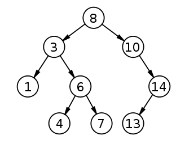

Entonces, arbol.estaBalanceado() = False (el nodo 10 no está balanceado, la altura del subárbol izquierdo es 0 y la del derecho 2. Notar que el nodo 8 está balanceado y el 10 no)


# **Ejercicio 3** (TDA ABB)

Escribir la operación **padresOcupados** del TDA ABB que retorna la cantidad de nodos en el árbol que poseen exactamente 2 hijos. La operación puede hacer uso de las operaciones del TDA ABB: estaVacio y del TDA NodoArbol: tieneIzquierdo y tieneDerecho.

Por ejemplo, para el siguiente ABB llamado árbol:

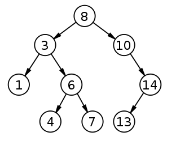

arbol.padresOcupados() = 3 (Los nodos 8, 3 y 6)


# **Ejercicio 4** (TDA ABB)

Escribir la operación **obtenerHermano** del TDA ABB que recibe un número N y retorna el número del nodo hermano del nodo que contienme al número N. Dos nodos se definen como hermanos cuando tienen el mismo padre. Si el número N no está en el árbol o no tiene hermano, la operación debe retornar None.

Por ejemplo, para el siguiente ABB llamdo arbol:

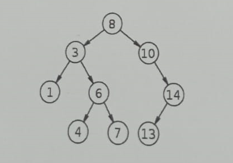

arbol.obtenerHermano(1) = 6

# **Ejercicio 5** (TDA ABB)

Escribir la operación sumaHojas del TDA ABB que retorna la suma de todos los números en el ABB en nodos
que sean hoja. La operación puede hacer uso de las operaciones del TDA ABB: estaVacio y del TDA
NodoArbol: tieneIzquierdo y tieneDerecho
Por ejemplo, para el siguiente ABB llamado árbol:

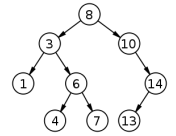
arbol.sumaHojas() = 1 + 4 + 7 + 13

# **Ejercicio 6** (TDA ABB)

Escribir la operación **sumaHastaNivel** del TDA ABB que recibe un nivel N por parámetro y retorna la suma de todos los números en el ABB en nodos que estén a nivel menor o igual a N. La operación puede hacer uso de las operaciones del TDA ABB: estaVacio y del TDA NodoArbol: tieneIzquierdo y tieneDerecho